Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [9]:
# import statement
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [11]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


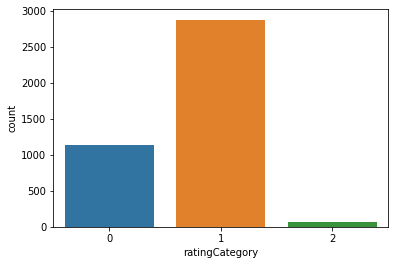

In [12]:
import seaborn as sns

sns.countplot(x='ratingCategory', data=train)

In [13]:
train['ratingCategory'].value_counts()

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

### Define Pipeline Components

In [14]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier() # clf = classifier

pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [15]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20),
    'vect__min_df': (0.02, 0.05), 
    'vect__max_features': (1000, None), 
    'clf__max_depth': (5,10,15,20), 
    'clf__n_estimators': (5,10)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'clf__max_depth': (5, 10, 15, 20), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (1000, None), 'clf__n_estimators': (5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [16]:
grid_search.best_score_

0.7208221189136286

In [17]:
grid_search.best_params_

{'clf__max_depth': 20,
 'clf__n_estimators': 10,
 'vect__max_df': 0.75,
 'vect__max_features': 1000,
 'vect__min_df': 0.02}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [18]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [19]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [20]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [21]:
subNumber = 0

In [22]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import xgboost as xgb
#from spicy.stats import randint, uniform

svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized', 
                   n_iter=10)

In [24]:
lsi = Pipeline([('vect', vect), ('svd', svd)])
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = xgb.XGBClassifier()

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [25]:
parameters = {
    'lsi__svd__n_components': [10,100,250], # this how you call subcomponents of a pipeline
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

In [26]:
# fit

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter vect for estimator Pipeline(memory=None,
     steps=[('lsi', Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=...s_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
grid_search.best_score_

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [38]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint, uniform

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [29]:
import spacy
nlp = spacy.load("en_core_web_lg")
doc = nlp("It's a pirates life for me")

In [30]:
pirate_vector = doc.vector
print(len(pirate_vector))

300


In [31]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [33]:
X = get_word_vectors(train['description'])

len(X) == len(train['description'])

True

In [ ]:
# Continue Word Embedding Work Here

clf = GradientBoostingClassifier()
search = RandomizedSearchCV(clf, param_dist, cv=5, n_iter=10, n_jobs=-1, verbose=1)
search.fit(X, )

### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 75% accuracy on the Kaggle competition. Once you have achieved 75% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

In [34]:
X = get_word_vectors(train['description'])
len(X) == len(train['description'])

True

In [40]:
svd = TruncatedSVD()
clf = xgb.XGBClassifier(random_state=7)
pipe = Pipeline([('svd', svd), ('clf', clf)])

parameters = {
    'svd__n_components': randint(10, 250), 
    'clf__n_estimators': randint(500, 1000), 
    'clf__learning_rate': uniform(0.1, 0.5), 
    'clf__max_depth': randint(10, 100)
}

search = RandomizedSearchCV(pipe, parameters, cv=3, n_jobs=-1, verbose=1)
search.fit(X, train['ratingCategory'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)), ('clf', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain',...s_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'svd__n_components': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f771e3d2c50>, 'clf__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f771e2d7828>, 'clf__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f771e2d7a58>, 'clf__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f771e2d7c88>},
          pre_dispatch='2*

In [41]:
print(search.best_score_)

0.7396623440176169


In [43]:
# predictions on test-dataset

Y = get_word_vectors(test['description'])

pred = search.predict(Y)
submission = pd.DataFrame({'id': test['id'], 'ratingCategory': pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [44]:
subNumber += 1
submission.to_csv(f'./data/submission{subNumber}.csv', index=False)

In [ ]:
# What is "Sentiment Analysis"?

"""Sentiment Analysis is the contextual minig of text which identifies and extracts subjective information 
in source material, and help a business to understand the social sentiment of their brand, product or service 
while monitoring online conversations"""

# Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response.

"""Document Classification is when you have a set of predefined classes and you want to classify a new incoming item in one of those classes. 
Sentiment analysis is the technique for measuring the polarity of input text. How much positive or negative context the text has. Doc classification
classifies an item into a predetermined class where as sentiment analysis measures the polarity of an item"""

# How do create labeled sentiment data? Are those labels really sentiment?

# What are common applications of sentiment analysis?